In [7]:
import torch
from torch.utils.data import DataLoader
from dataset import VitalDataset_fs
idx = 3
root_dir = f'../data/all_{idx}'
trdt  = VitalDataset_fs(root_dir,f'../data/pd_gy/train_{idx}.json')
valdt = VitalDataset_fs(root_dir,f'../data/pd_gy/val_{idx}.json') 
tedt  = VitalDataset_fs(root_dir,f'../data/pd_gy/test_{idx}.json') 

trdl  = torch.utils.data.DataLoader(trdt,4)
valdl  = torch.utils.data.DataLoader(valdt,4)
tedl  = torch.utils.data.DataLoader(valdt,4)

from models import PrePostNet
from train import get_classweight
model = PrePostNet()

from torch import nn
device     = 'cuda' if torch.cuda.is_available() else 'cpu'

batch_size = 4

class_weight = get_classweight(trdt).to(device)
loss       = nn.CrossEntropyLoss(class_weight)
# loss       = nn.CrossEntropyLoss()


lr         = 0.01
params = [p for p in model.parameters() if p.requires_grad]
opt       = torch.optim.SGD(params, lr=lr, momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=5, gamma=0.5)
# opt  = torch.optim.Adam(params,lr=lr)

In [8]:
from train import trainval
best_model,val_losses = trainval(trdl,valdl,model,loss,opt,scheduler=scheduler,device=device, exist_acc=True)

[0] acc/loss: 0.81/0.232283
[1] acc/loss: 0.83/0.159888
[2] acc/loss: 0.83/0.176197
[3] acc/loss: 0.78/0.530542
[4] acc/loss: 0.68/0.296496
[5] acc/loss: 0.73/0.239821
[6] acc/loss: 0.68/0.273841


## vis optim lr 

In [11]:
def visualize_scheduler(optimizer, scheduler, epochs):
    lrs = []
    for _ in range(epochs):
        lrs.append(optimizer.param_groups[0]['lr'])
        scheduler.step()
        # 학습 과정이 없으므로 Optimizer.step()은 생략해도 됨

    plt.plot(lrs)
    plt.show()

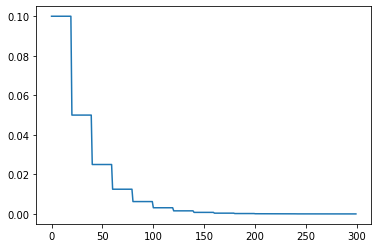

In [13]:
from matplotlib import pyplot as plt
from torch import optim
epochs = 300
optimizer = optim.SGD([torch.tensor(1)], lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

visualize_scheduler(optimizer, scheduler, epochs)
